<a href="https://colab.research.google.com/github/Arathi98/TCS_PROJECT_ARATHI/blob/main/ARATHIMV_TCS_PROJECT1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("DRUGS_SIDE_EFFECTS_DATASET.csv")

In [5]:
df.head()

,NAME,GENDER,DRUG NAME,AGE,RACE,SIDE EFFECTS
0,Aaban,M,topamax,41.0,White,Mild Side Effects
1,Aaban,M,zocor,53.0,"Hispanic, White",Extremely Severe Side Effects
2,Aabha,F,tazorac,31.0,White,Mild Side Effects
3,Aabha,F,voltaren,44.0,White,Severe Side Effects
4,Aabid,M,tramadol,24.0,White,No Side Effects


In [6]:
df.shape

(21475, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21475 entries, 0 to 21474
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   NAME          21475 non-null  object 
 1   GENDER        21474 non-null  object 
 2   DRUG NAME     21474 non-null  object 
 3   AGE           21474 non-null  float64
 4   RACE          21474 non-null  object 
 5   SIDE EFFECTS  21474 non-null  object 
dtypes: float64(1), object(5)
memory usage: 1006.8+ KB


In [8]:
df.describe()

,AGE
count,21474.000000
mean,41.471035
std,12.402294
min,15.000000
25%,31.000000
50%,41.000000
75%,51.000000
max,300.000000


In [9]:
df.describe()

,AGE
count,21474.000000
mean,41.471035
std,12.402294
min,15.000000
25%,31.000000
50%,41.000000
75%,51.000000
max,300.000000


In [10]:
df.isna().sum()

NAME            0
GENDER          1
DRUG NAME       1
AGE             1
RACE            1
SIDE EFFECTS    1
dtype: int64

In [11]:
df.nunique()

NAME            7772
GENDER             2
DRUG NAME        406
AGE               61
RACE               9
SIDE EFFECTS       5
dtype: int64

# EDA

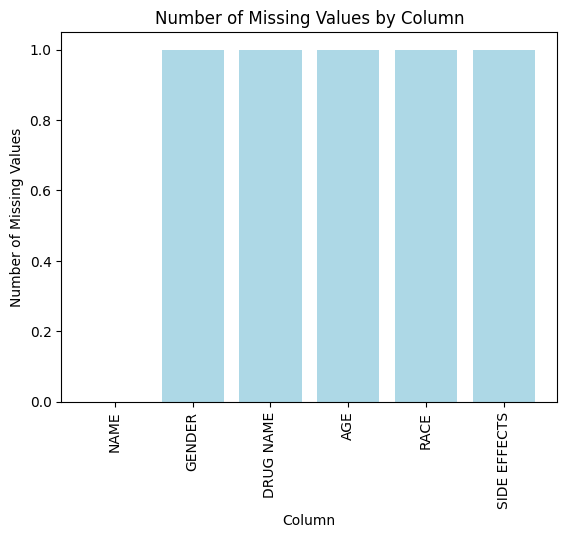

In [12]:
null_counts = df.isna().sum()
plt.bar(null_counts.index, null_counts.values,color="lightblue")
plt.xlabel('Column')
plt.ylabel('Number of Missing Values')
plt.title('Number of Missing Values by Column')
plt.xticks(rotation=90)
plt.show()

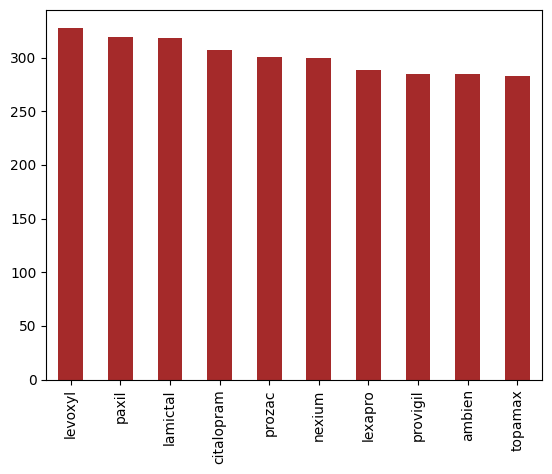

In [13]:
df["DRUG NAME"].value_counts().head(10).plot(kind="bar",color='brown')
plt.show()

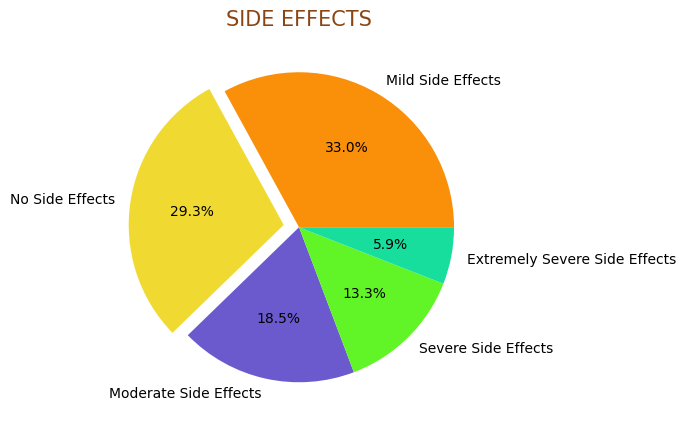

In [14]:
label=df["SIDE EFFECTS"].value_counts().index
count=df["SIDE EFFECTS"].value_counts().values
color = ['#FA8F0A','#F0DA32','slateblue','#61F527','#18DE9D']
explode = (0, 0.1, 0, 0, 0)
plt.figure(1, figsize=(5,10))
plt.pie(count, labels=label, colors=color, autopct='%1.1f%%', explode=explode)
plt.title("SIDE EFFECTS",color="saddlebrown",fontsize=15)
plt.show()

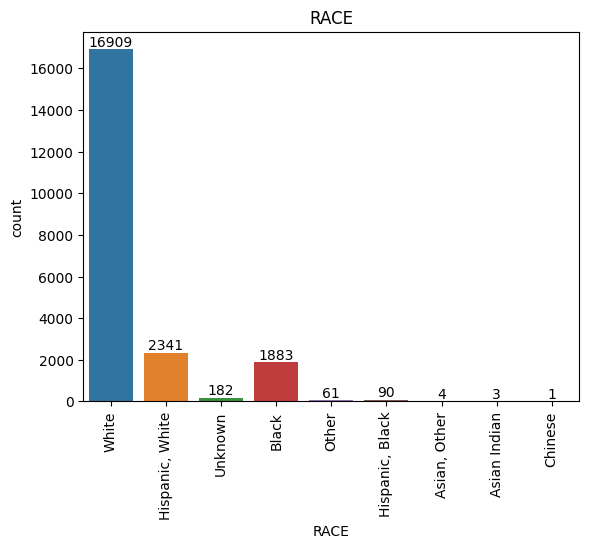

In [15]:
ax = sns.countplot(data = df,x='RACE')
plt.title('RACE')
x = ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)

plt.show()

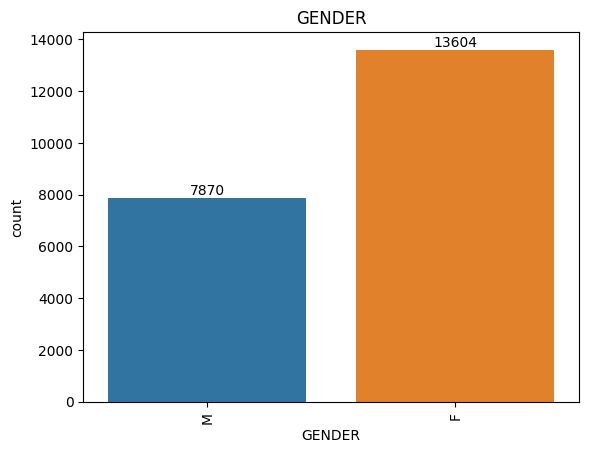

In [16]:
ax = sns.countplot(data = df,x='GENDER')
plt.title('GENDER')
x = ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)

plt.show()

Text(0, 0.5, 'Range')

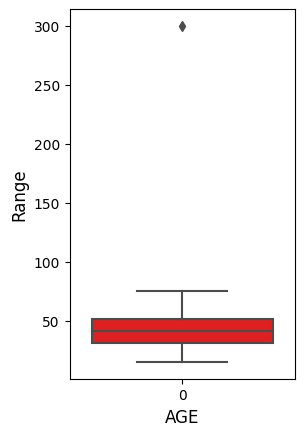

In [17]:
plt.subplot(1, 2, 1)
sns.boxplot(df['AGE'], color = 'red')
plt.xlabel('AGE', fontsize = 12)
plt.ylabel('Range', fontsize = 12)

In [18]:
#BIVARIATE ANALYSIS

<Figure size 1200x1000 with 0 Axes>

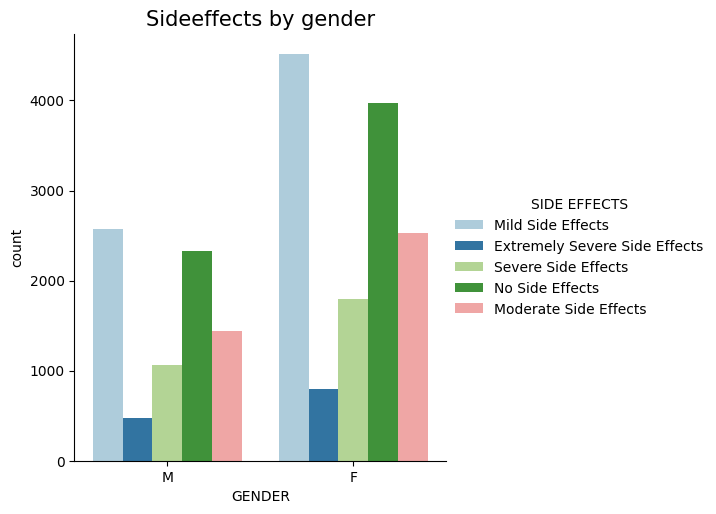

In [19]:
plt.figure(figsize=(12, 10))
sns.catplot(x ='GENDER', hue='SIDE EFFECTS', kind='count', data=df, palette='Paired')
plt.title('Sideeffects by gender', fontsize = 15)
plt.show()

<Figure size 1200x1000 with 0 Axes>

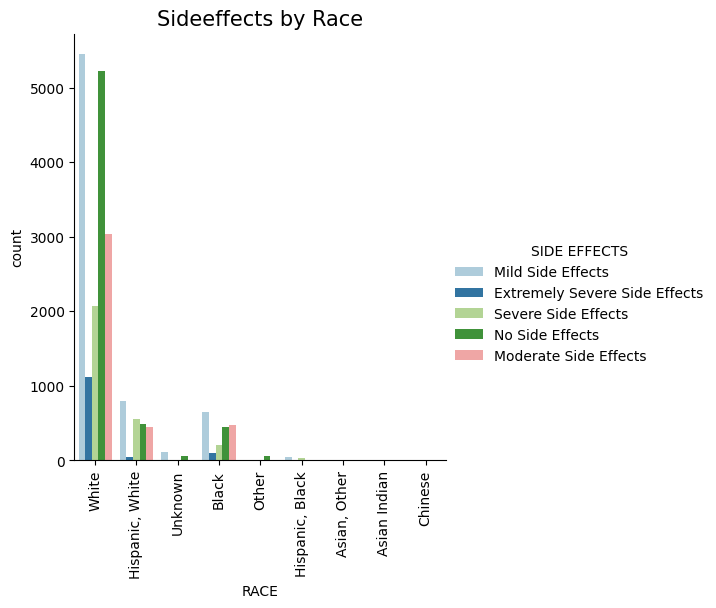

In [20]:
plt.figure(figsize=(12, 10))
sns.catplot(x ='RACE', hue='SIDE EFFECTS', kind='count', data=df, palette='Paired')
plt.title('Sideeffects by Race', fontsize = 15)
plt.xticks(rotation=90)
plt.show()

In [21]:
#REMOVING OUTLIERS

In [22]:
for i in ['AGE']:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR=Q3-Q1
    upper_limit=Q3+1.5*IQR
    lower_limit=Q1-1.5*IQR
    df[i].where(df[i] > lower_limit, lower_limit, inplace = True)
    df[i].where(df[i] < upper_limit, upper_limit, inplace = True)

Text(0, 0.5, 'Range')

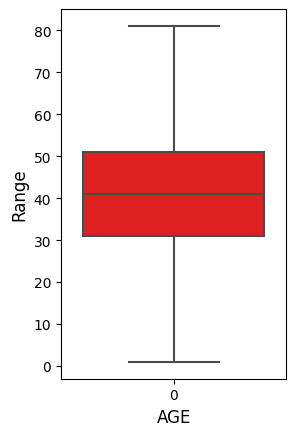

In [23]:
plt.subplot(1, 2, 1)
sns.boxplot(df['AGE'], color = 'red')
plt.xlabel('AGE', fontsize = 12)
plt.ylabel('Range', fontsize = 12)

In [24]:
#TREATING NULLVALUES

In [25]:
df['AGE'].fillna(df['AGE'].median(), inplace = True)
df.isnull().sum()

NAME            0
GENDER          1
DRUG NAME       1
AGE             0
RACE            1
SIDE EFFECTS    1
dtype: int64

In [26]:
#ENCODING

In [27]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import HashingVectorizer



In [28]:
df = df.drop('NAME', axis=1)

In [29]:
#Encode Categorical Variables
label_encoder = LabelEncoder()
df['GENDER'] = label_encoder.fit_transform(df['GENDER'])
df['RACE'] = label_encoder.fit_transform(df['RACE'])
df['SIDE EFFECTS'] = label_encoder.fit_transform(df['SIDE EFFECTS'])
df['DRUG NAME'] = label_encoder.fit_transform(df['DRUG NAME'])

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21475 entries, 0 to 21474
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GENDER        21475 non-null  int64  
 1   DRUG NAME     21475 non-null  int64  
 2   AGE           21475 non-null  float64
 3   RACE          21475 non-null  int64  
 4   SIDE EFFECTS  21475 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 839.0 KB


array([[<Axes: title={'center': 'AGE'}>]], dtype=object)

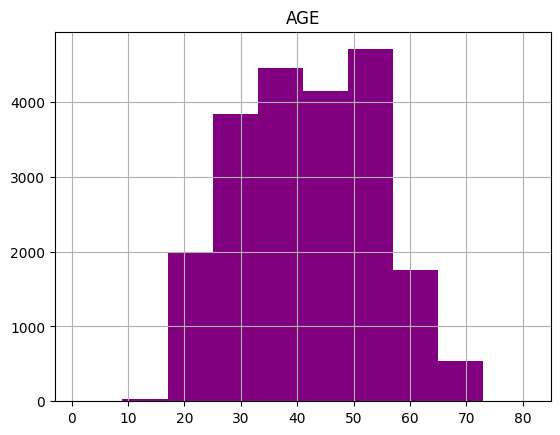

In [31]:
df.hist(column='AGE',color='purple')

<Axes: >

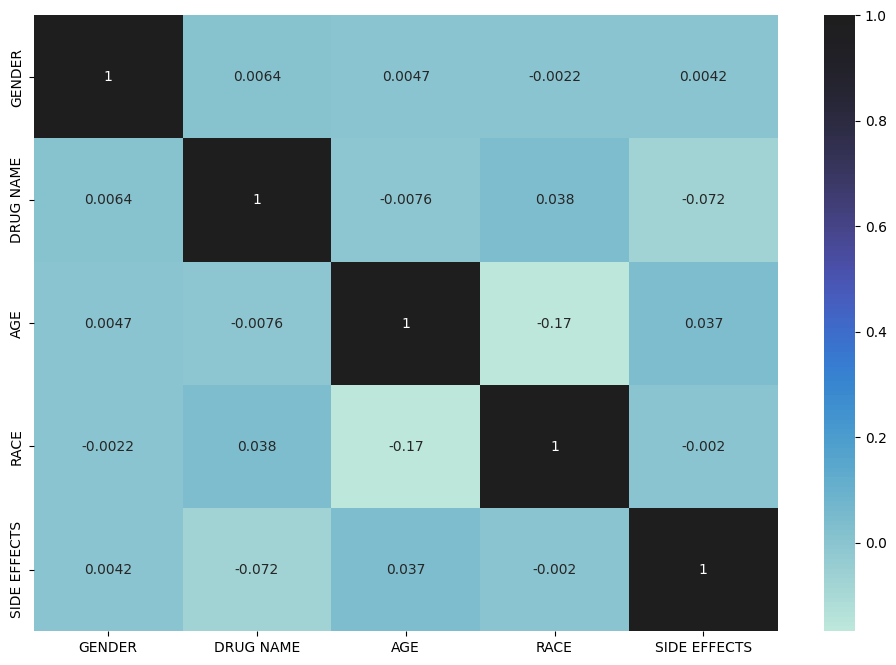

In [32]:
plt.figure(figsize=(12, 8))
sns.heatmap(pd.DataFrame(df, columns=df.columns).corr(), annot=True, center=True)

In [33]:
X = df.drop(['SIDE EFFECTS'], axis=1)
y = df['SIDE EFFECTS']


In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [36]:
from sklearn.svm import SVC
svmclf=SVC(kernel='linear')
svmclf.fit(X_train,y_train)
y_pred_svm=svmclf.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score
print('Accuracy = ',accuracy_score(y_test,y_pred_svm))

Accuracy =  0.33317811408614667


In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import KFold, cross_val_score

Logistic Regression
34.57508731082654
[[   0  213    0   33    0]
 [   0 1203    0  228    0]
 [   0  645    0  110    0]
 [   0  997    0  282    0]
 [   0  449    0  135    0]]


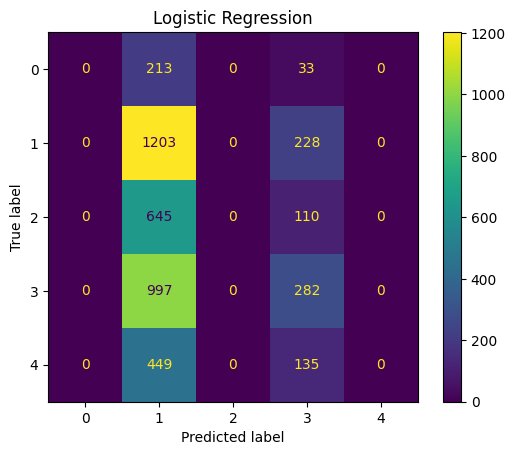

Random Forset Classifier
91.78114086146682
[[ 229    6    1   10    0]
 [  19 1292   64   40   16]
 [   1   25  691   24   14]
 [   2   55   10 1206    6]
 [   6   39    3   12  524]]


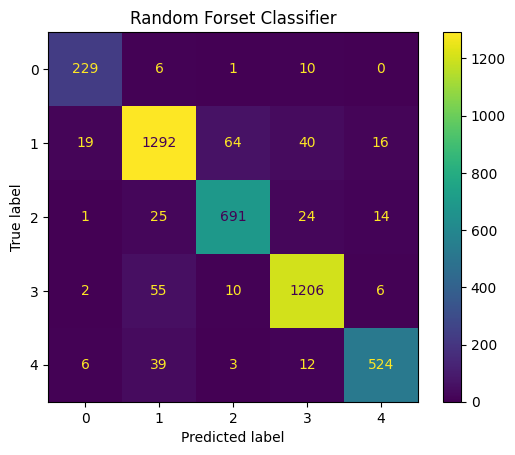

KNeighbors Classifier
92.82887077997671
[[ 220   18    2    4    2]
 [  11 1336   33   35   16]
 [   3   23  711   12    6]
 [   9   43   26 1194    7]
 [   8   35    4   11  526]]


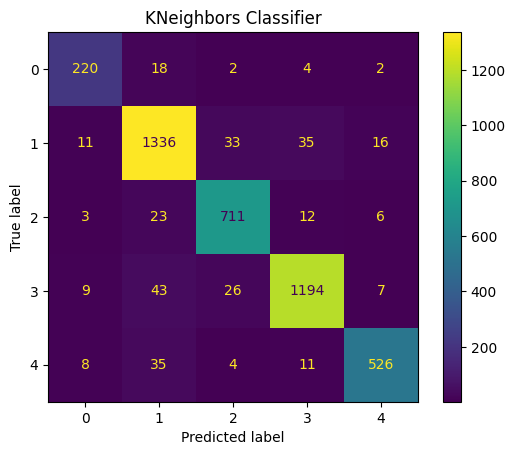

Gradient Boosting Classifier
64.86612339930151
[[  58   71   33   83    1]
 [  12 1062   95  211   51]
 [  19  217  390  114   15]
 [   6  154   52 1034   33]
 [   2  188    3  149  242]]


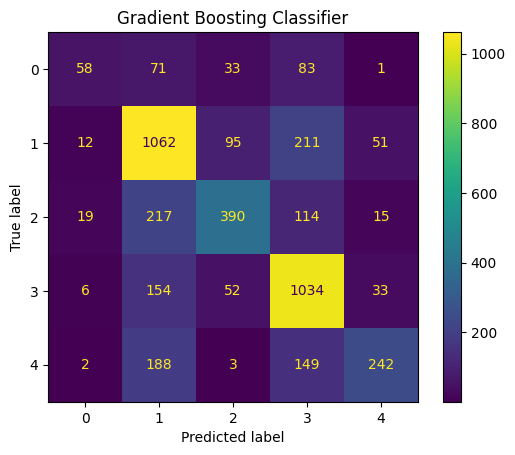

Support Vector Machines
42.63096623981374
[[   0  135    5  106    0]
 [   0 1095   32  289   15]
 [   0  437   85  213   20]
 [   0  644   25  604    6]
 [   0  279    5  253   47]]


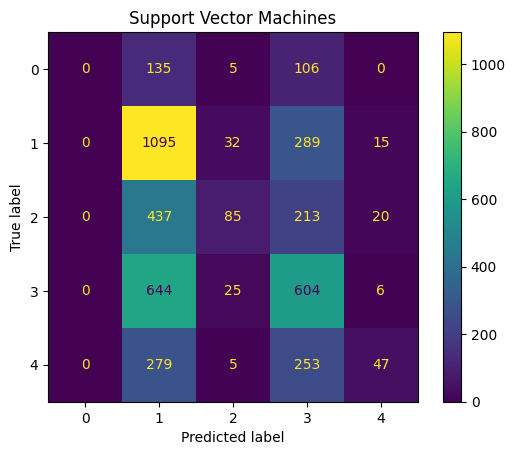

Decision Tree
83.63213038416764
[[ 169   27    1   44    5]
 [  32 1210   67  111   11]
 [  17   48  646   30   14]
 [   3  129   21 1112   14]
 [   8   80   11   30  455]]


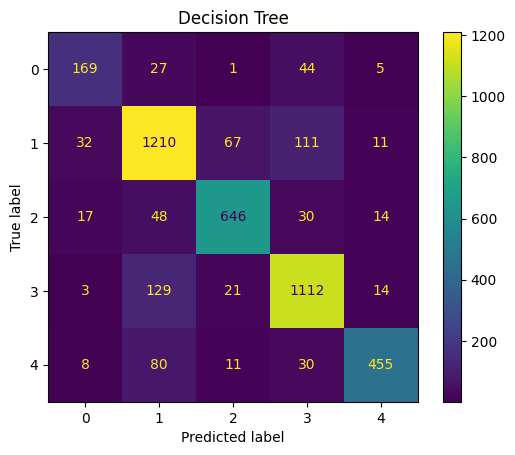

AdaBoost Classifier
18.253783469150175
[[143   0  14  32  57]
 [557 180  26 245 423]
 [307  98  62  91 197]
 [616 127  12 185 339]
 [279  44   0  47 214]]


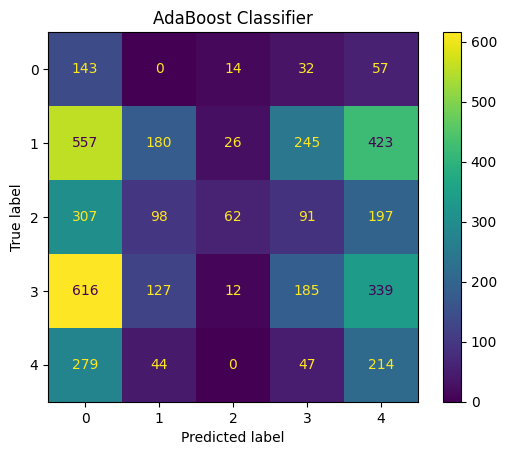

In [38]:
value= [LogisticRegression(), RandomForestClassifier(), KNeighborsClassifier(),GradientBoostingClassifier(),SVC(),DecisionTreeClassifier(), AdaBoostClassifier()]

key= ['Logistic Regression', 'Random Forset Classifier',   'KNeighbors Classifier','Gradient Boosting Classifier','Support Vector Machines','Decision Tree','AdaBoost Classifier']

models= dict(zip(key,value))
accuracy_scores=[]
for key,value in models.items():
    value.fit(X_train,y_train)
    y_pred= value.predict(X_test)
    accuracy= accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(key)
    print(accuracy*100)
    conf = confusion_matrix(y_test, y_pred)
    print(conf)
    ConfusionMatrixDisplay(confusion_matrix=conf).plot()
    plt.title(key)
    plt.show()

In [39]:

from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
rfe = RFE(model, n_features_to_select=4)  # Set the desired number of features to retain

# Fit RFE on the data and get the rankings of the features
rfe.fit(X, y)
feature_ranking = pd.Series(rfe.ranking_, index=X.columns).sort_values()

# Print the feature rankings
print("Feature Rankings:")
print(feature_ranking)




Feature Rankings:
GENDER       1
DRUG NAME    1
AGE          1
RACE         1
dtype: int64


In [40]:
selected_features = X.columns[rfe.support_].tolist()


print("Selected Features:",selected_features)




Selected Features: ['GENDER', 'DRUG NAME', 'AGE', 'RACE']
